In [1]:
from altered_states2 import Grid
import matplotlib.pyplot as plt
from itertools import combinations
import random

POPULATION_SIZE = 1000
TERMINAL_FITNESS = 330759736
MAX_GENERATIONS = 100
GENERATION_CUTTOFF = 0.75 # cuttoff relative to the fitness of the highest individual


In [2]:
def population_fitness_statistics(population):
    fitnesses = [g.fitness for g in population]
    plt.stem(fitnesses)
    plt.show()
    print(f"Average fitness: {sum(fitnesses)/len(fitnesses)}\n")

def print_individual(grid, name):
    print(f"{name} grid:")
    grid.print_grid()
    print(grid.states)
    print(grid.fitness)

def plot_fitnesses_over_gens(max_fitnesses):
    plt.plot(max_fitnesses)
    plt.show()
    

In [3]:
def propagate_next_generation(population, cutoff):
    next_generation = population[cutoff:]
    #next_generation = [individual for individual in population if individual.fitness > cutoff]
    empty_capacity = POPULATION_SIZE - len(next_generation)
    possible_pairs = list(combinations(next_generation, 2))
    num_combos = len(possible_pairs)
    if empty_capacity > num_combos:
        (q, r) = divmod(empty_capacity, num_combos)
        selected_pairs = q * possible_pairs + possible_pairs[:r]
    else:
        selected_pairs = random.sample(possible_pairs, empty_capacity)
    newborns = [parent1.cross(parent2) for (parent1, parent2) in selected_pairs]
    return next_generation + newborns

GENERATION 0


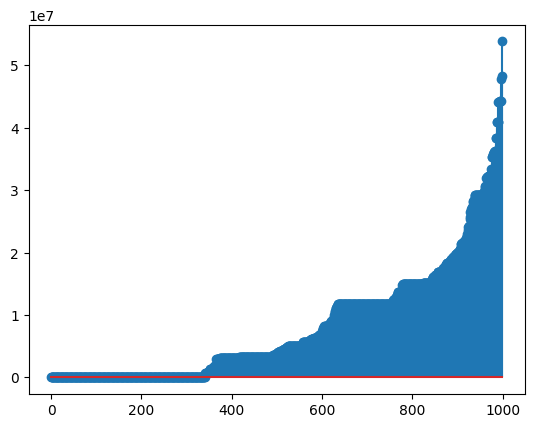

Average fitness: 8027518.814

Most fit grid:
D J N E G
S W E C T
D A H O D
U I C X Y
D D I S A
['HAWAII', 'IDAHO', 'IOWA', 'NEVADA', 'OHIO', 'TEXAS', 'UTAH']
53805929
GENERATION 1


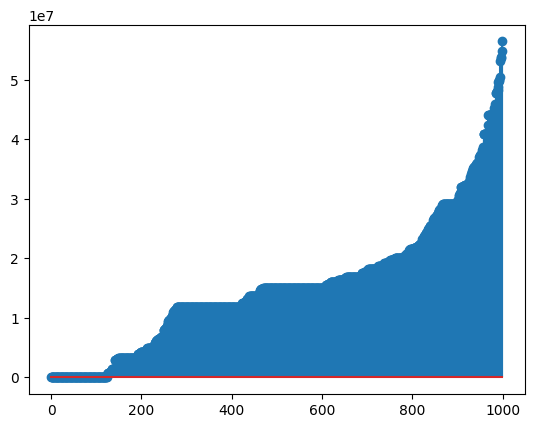

Average fitness: 15167112.502

Most fit grid:
H O H O L
A X H D R
D I A B A
C T W S H
U E G K L
['COLORADO', 'HAWAII', 'IDAHO', 'IOWA', 'OHIO', 'TEXAS', 'UTAH']
56475029
GENERATION 2


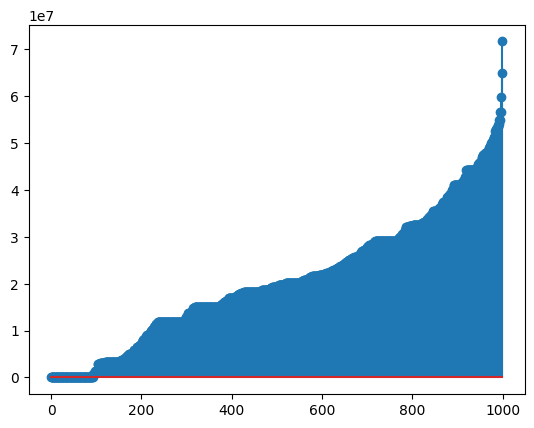

Average fitness: 20542962.685

Most fit grid:
K H R F R
O U L O C
B X Y D X
R S A H U
T Y B G W
['COLORADO', 'FLORIDA', 'OHIO', 'TEXAS', 'UTAH']
71528470
GENERATION 3


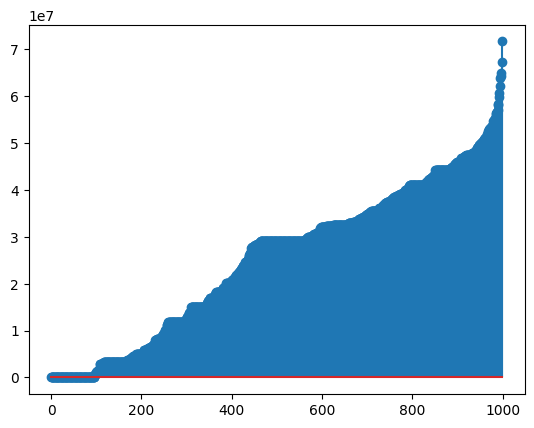

Average fitness: 24978440.313

Most fit grid:
K H R F R
O U L O C
B X Y D X
R S A H U
T Y B G W
['COLORADO', 'FLORIDA', 'OHIO', 'TEXAS', 'UTAH']
71528470
GENERATION 4


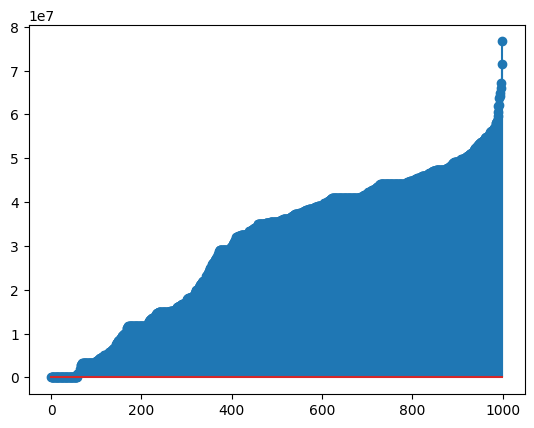

Average fitness: 30493997.854

Most fit grid:
M U O E F
L A I R Y
G J N G S
M H B A M
M T E J D
['ALABAMA', 'GEORGIA', 'INDIANA', 'IOWA', 'MAINE', 'OHIO', 'TEXAS', 'VIRGINIA']
76650789
GENERATION 5


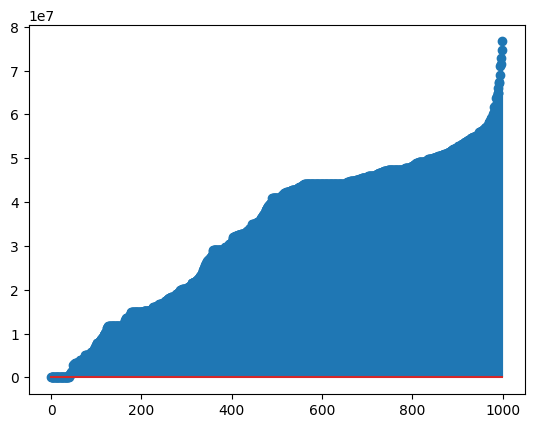

Average fitness: 33567977.802

Most fit grid:
M U O E F
L A I R Y
G J N G S
M H B A M
M T E J D
['ALABAMA', 'GEORGIA', 'INDIANA', 'IOWA', 'MAINE', 'OHIO', 'TEXAS', 'VIRGINIA']
76650789
GENERATION 6


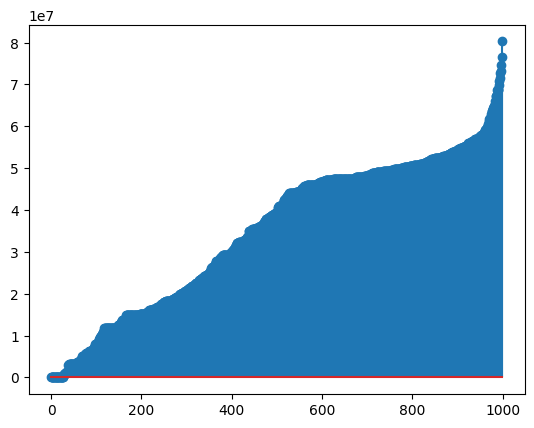

Average fitness: 34723543.711

Most fit grid:
M P O U F
L A I R Y
G W D A Y
O T E S R
U T H N E
['ALABAMA', 'FLORIDA', 'IDAHO', 'IOWA', 'MAINE', 'NEVADA', 'OHIO', 'TEXAS', 'UTAH']
80275483
GENERATION 7


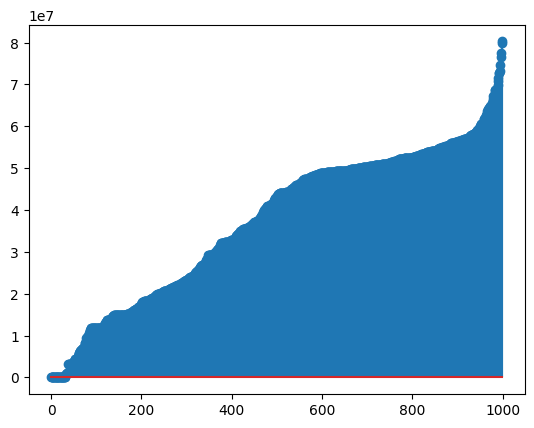

Average fitness: 36857599.772

Most fit grid:
M P O U F
L A I R Y
G W D A Y
O T E S R
U T H N E
['ALABAMA', 'FLORIDA', 'IDAHO', 'IOWA', 'MAINE', 'NEVADA', 'OHIO', 'TEXAS', 'UTAH']
80275483
GENERATION 8


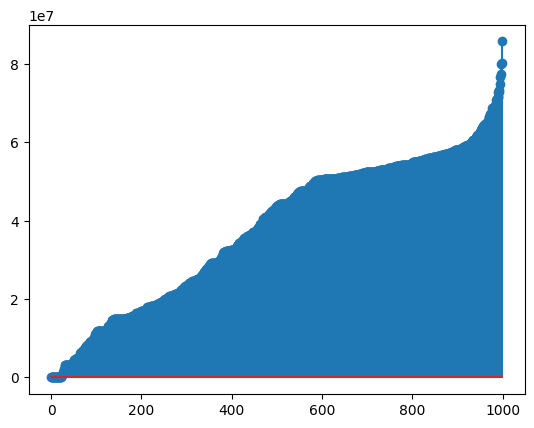

Average fitness: 37545518.885

Most fit grid:
F T O R V
C Y E G I
X S S D L
X A E Y A
I O B T B
['ALABAMA', 'FLORIDA', 'GEORGIA', 'IOWA', 'OHIO', 'OREGON', 'TEXAS']
85646952
GENERATION 9


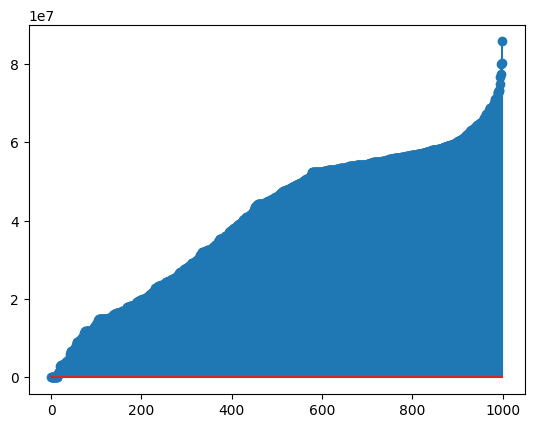

Average fitness: 40418429.511

Most fit grid:
F T O R V
C Y E G I
X S S D L
X A E Y A
I O B T B
['ALABAMA', 'FLORIDA', 'GEORGIA', 'IOWA', 'OHIO', 'OREGON', 'TEXAS']
85646952
GENERATION 10


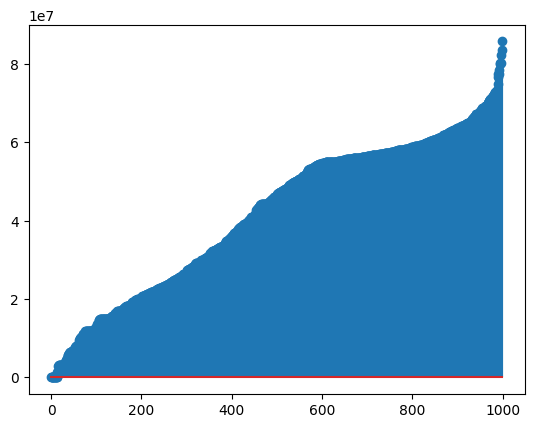

Average fitness: 41273450.283

Most fit grid:
F T O R V
C Y E G I
X S S D L
X A E Y A
I O B T B
['ALABAMA', 'FLORIDA', 'GEORGIA', 'IOWA', 'OHIO', 'OREGON', 'TEXAS']
85646952
GENERATION 11


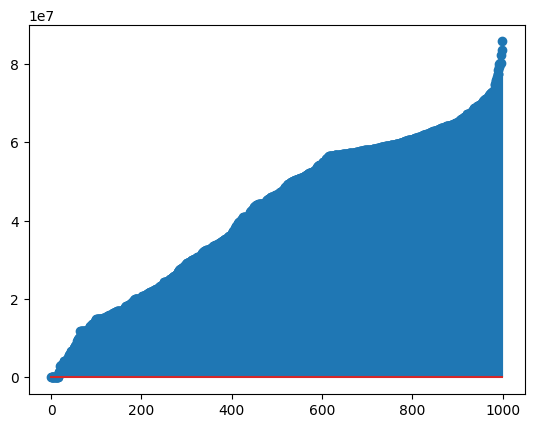

Average fitness: 42335020.2

Most fit grid:
F T O R V
C Y E G I
X S S D L
X A E Y A
I O B T B
['ALABAMA', 'FLORIDA', 'GEORGIA', 'IOWA', 'OHIO', 'OREGON', 'TEXAS']
85646952
GENERATION 12


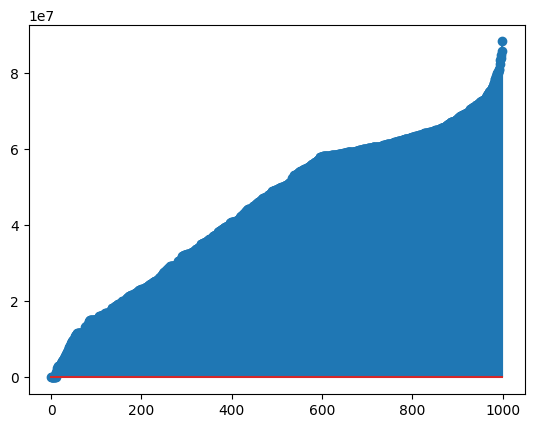

Average fitness: 44839662.434

Most fit grid:
F B O R W
X A L I S
G L A A D
D M G O H
W T E R O
['ALABAMA', 'ALASKA', 'FLORIDA', 'GEORGIA', 'IDAHO', 'IOWA', 'OHIO', 'OREGON', 'TEXAS']
88219449
GENERATION 13


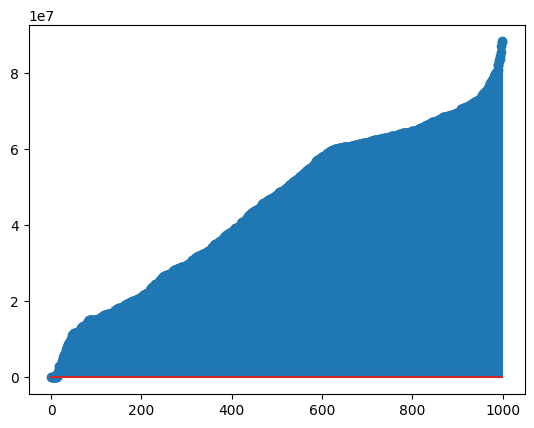

Average fitness: 44846239.749

Most fit grid:
F T O I V
L A N S R
T I N A Y
S A D R W
T E C P T
['ARIZONA', 'ARKANSAS', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
88388988
GENERATION 14


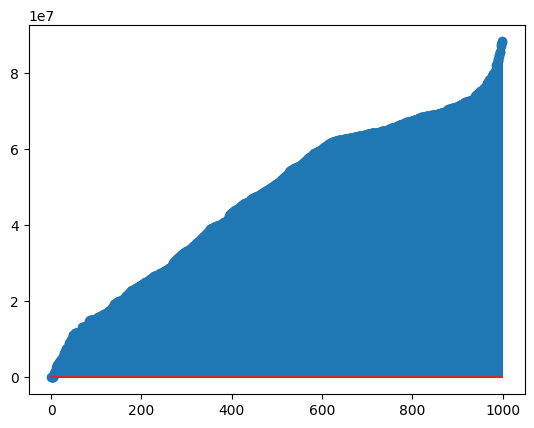

Average fitness: 47160549.15

Most fit grid:
F T O I V
L A N S R
T I N A Y
S A D R W
T E C P T
['ARIZONA', 'ARKANSAS', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
88388988
GENERATION 15


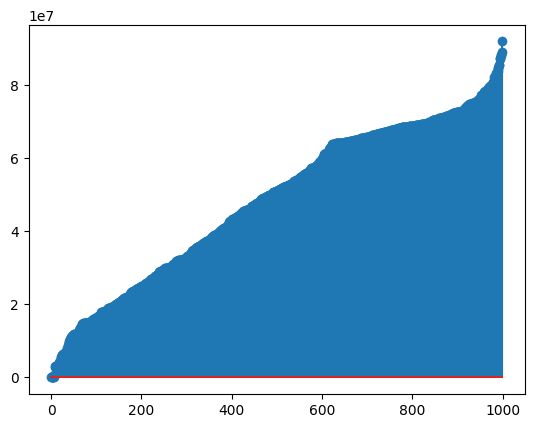

Average fitness: 47937089.598

Most fit grid:
S I N V T
O R I I A
A N S P E
A I A X R
L T O H T
['ARIZONA', 'ARKANSAS', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TEXAS', 'UTAH', 'VIRGINIA']
92031650
GENERATION 16


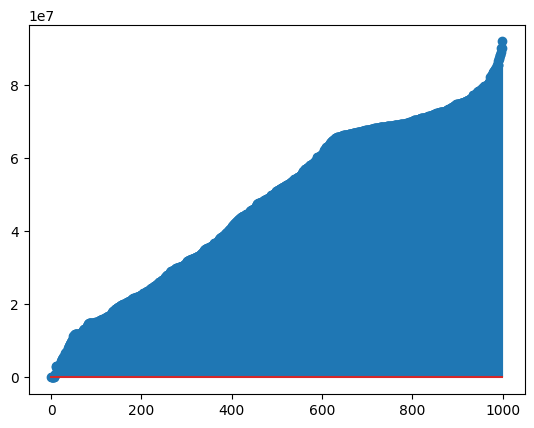

Average fitness: 47906331.402

Most fit grid:
S I N V T
O R I I A
A N S P E
A I A X R
L T O H T
['ARIZONA', 'ARKANSAS', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TEXAS', 'UTAH', 'VIRGINIA']
92031650
GENERATION 17


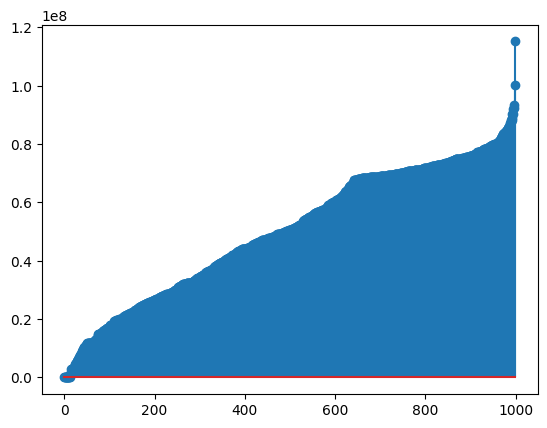

Average fitness: 49541059.075

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 18


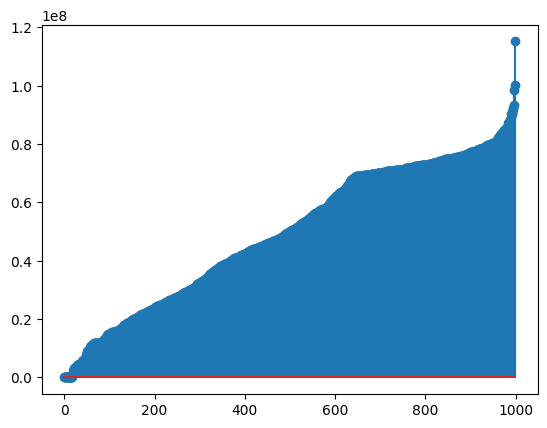

Average fitness: 48910808.27

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 19


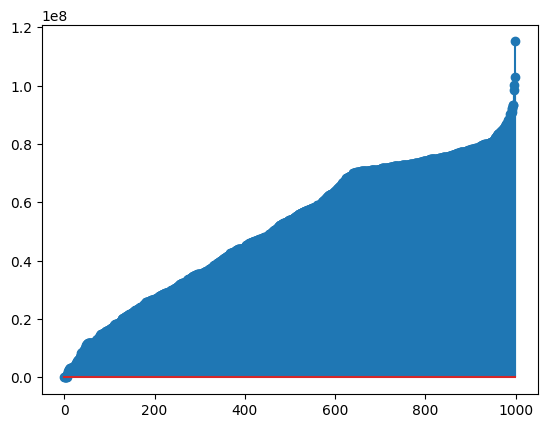

Average fitness: 51101322.603

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 20


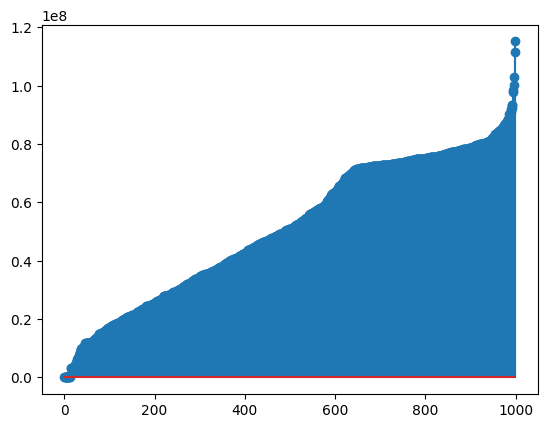

Average fitness: 50670516.092

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 21


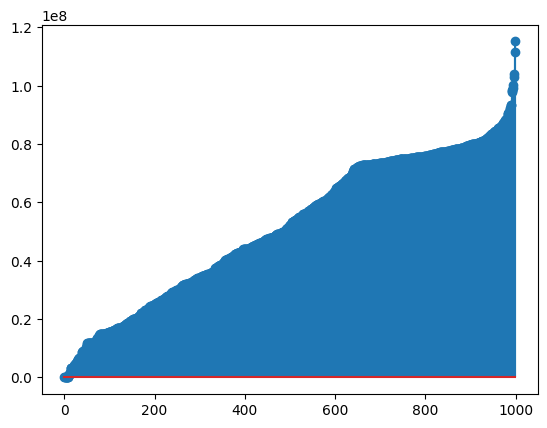

Average fitness: 51073790.074

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 22


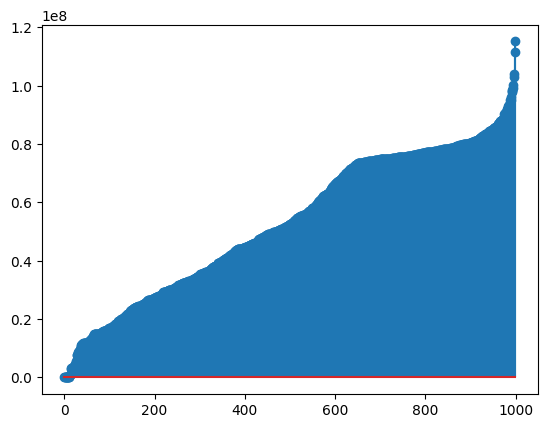

Average fitness: 52347548.799

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 23


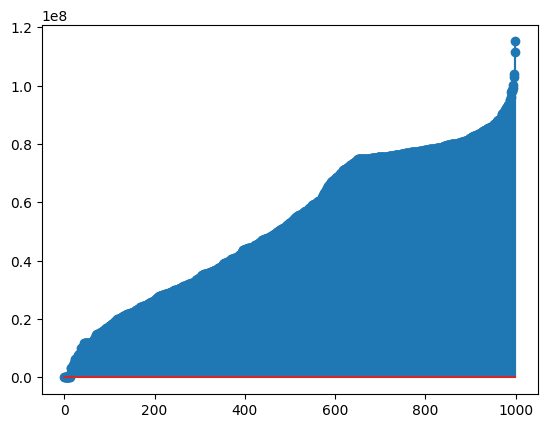

Average fitness: 52560707.687

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 24


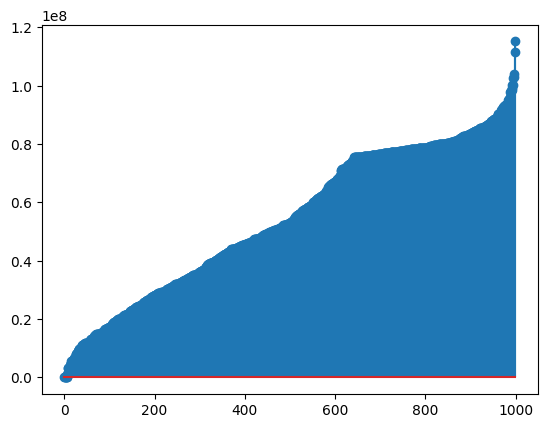

Average fitness: 53786514.084

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 25


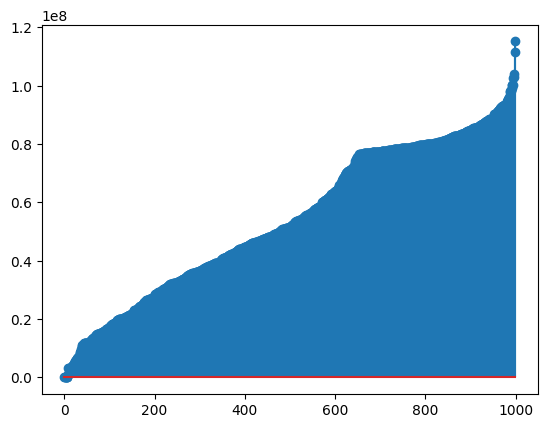

Average fitness: 53514576.707

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 26


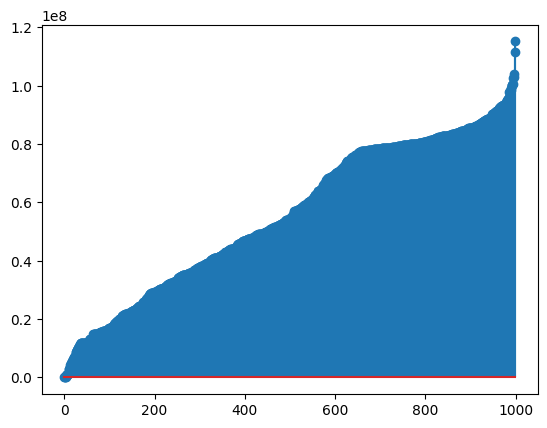

Average fitness: 55077460.783

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 27


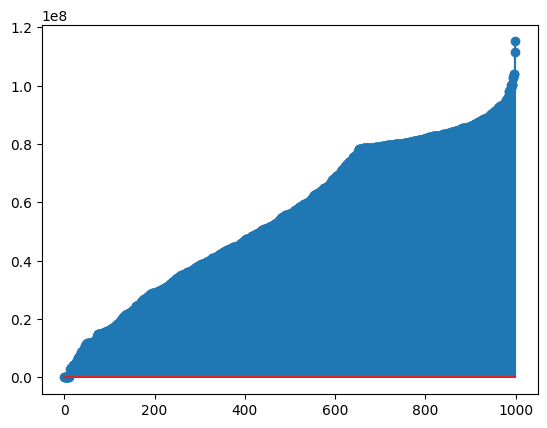

Average fitness: 55251713.461

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 28


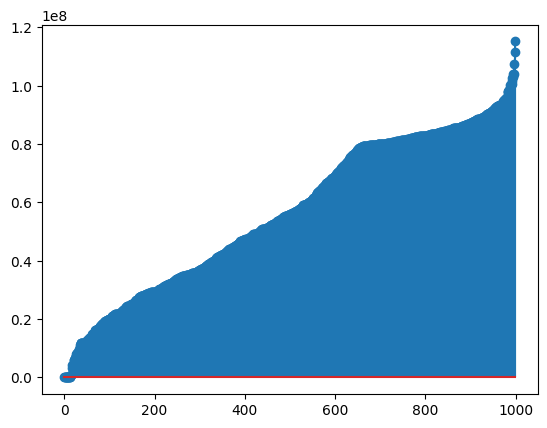

Average fitness: 56021867.339

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 29


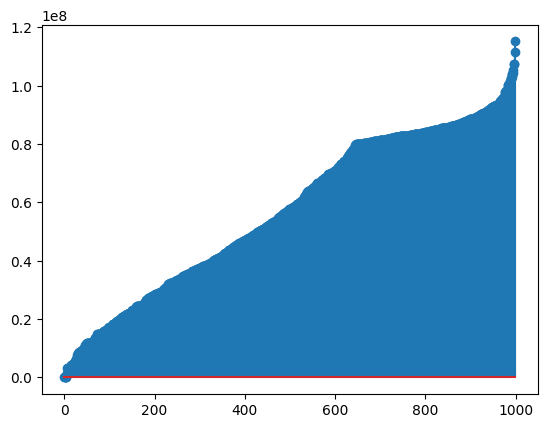

Average fitness: 56450901.239

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 30


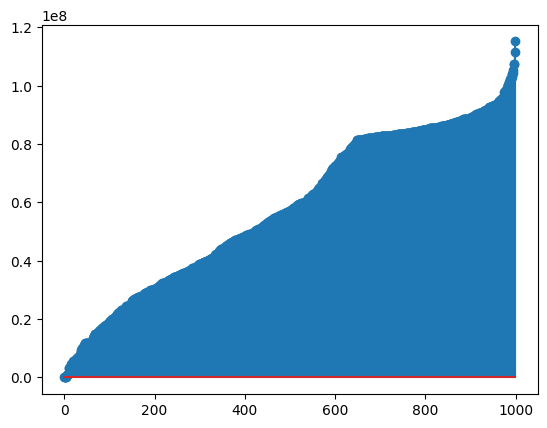

Average fitness: 57415592.179

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 31


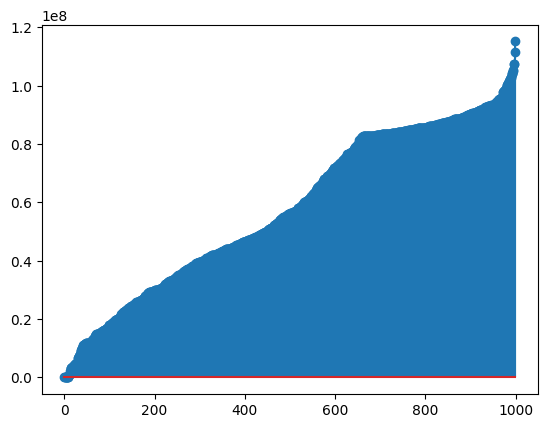

Average fitness: 57163751.315

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 32


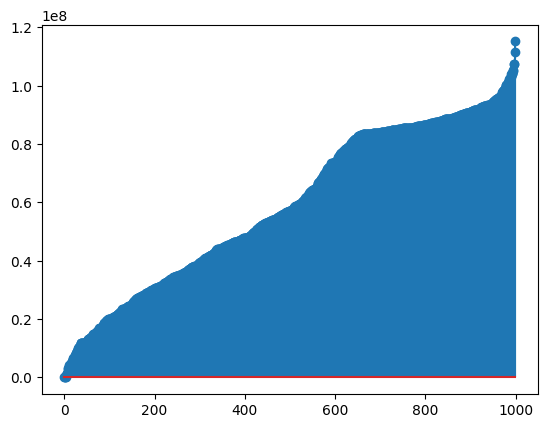

Average fitness: 58352354.627

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 33


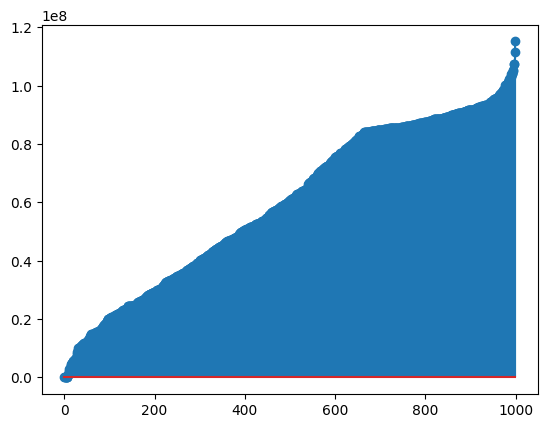

Average fitness: 59097510.759

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 34


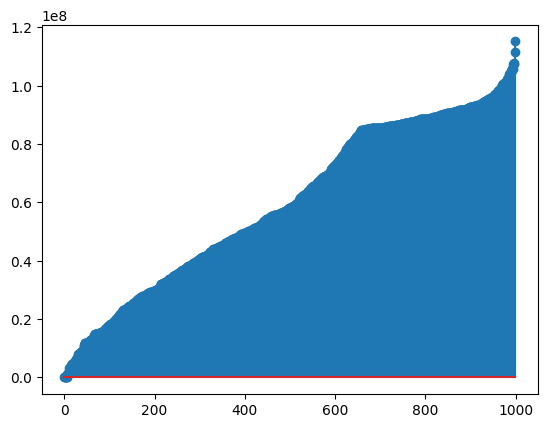

Average fitness: 59035718.048

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 35


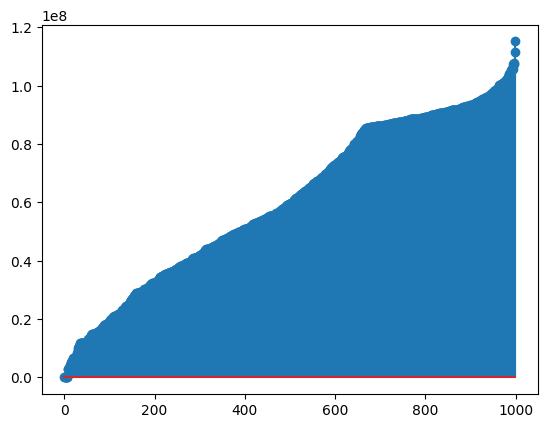

Average fitness: 60005345.934

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 36


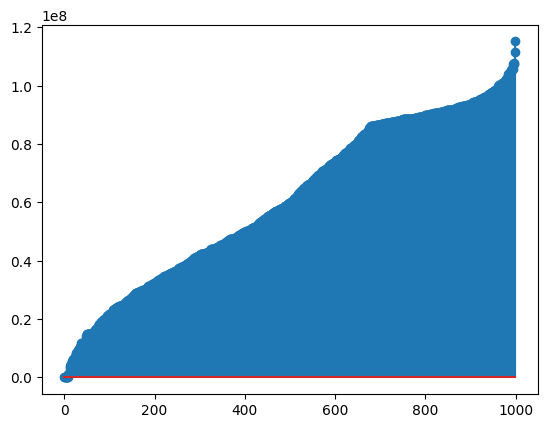

Average fitness: 60303681.752

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 37


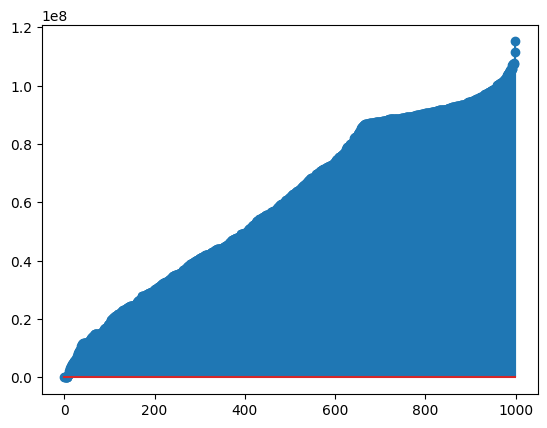

Average fitness: 60188127.718

Most fit grid:
F D G R V
B A I O L
A N S J E
T I A X O
L N O B I
['FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
115133814
GENERATION 38


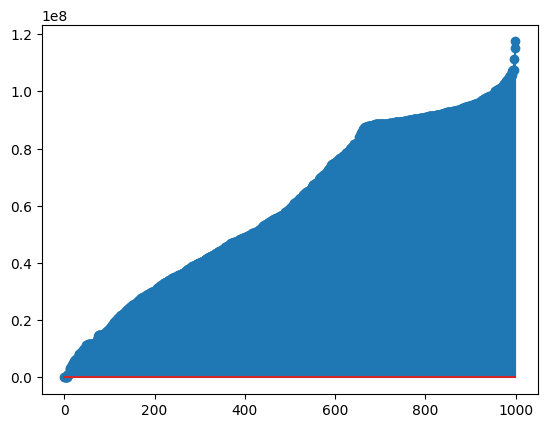

Average fitness: 59975837.371

Most fit grid:
F L O R V
L A G R I
G I S T D
L I A X N
O N O M E
['ALABAMA', 'ALASKA', 'FLORIDA', 'GEORGIA', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'MAINE', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
117476857
GENERATION 39


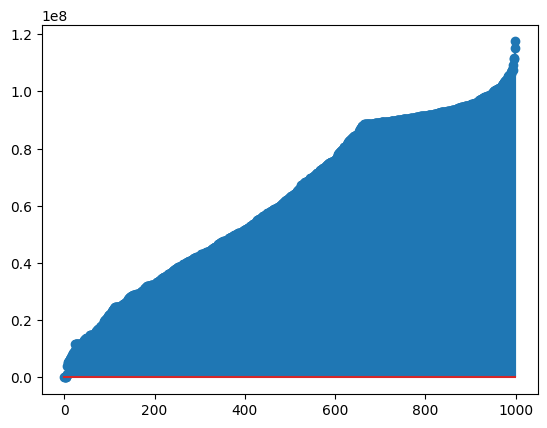

Average fitness: 62115177.525

Most fit grid:
F L O R V
L A G R I
G I S T D
L I A X N
O N O M E
['ALABAMA', 'ALASKA', 'FLORIDA', 'GEORGIA', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'MAINE', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
117476857
GENERATION 40


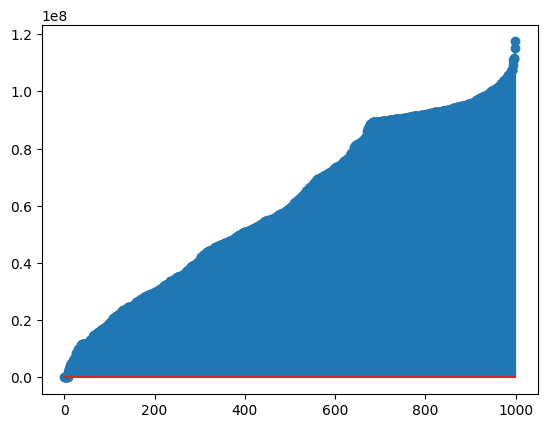

Average fitness: 60530097.391

Most fit grid:
F L O R V
L A G R I
G I S T D
L I A X N
O N O M E
['ALABAMA', 'ALASKA', 'FLORIDA', 'GEORGIA', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'MAINE', 'MONTANA', 'OHIO', 'TEXAS', 'VIRGINIA']
117476857
GENERATION 41


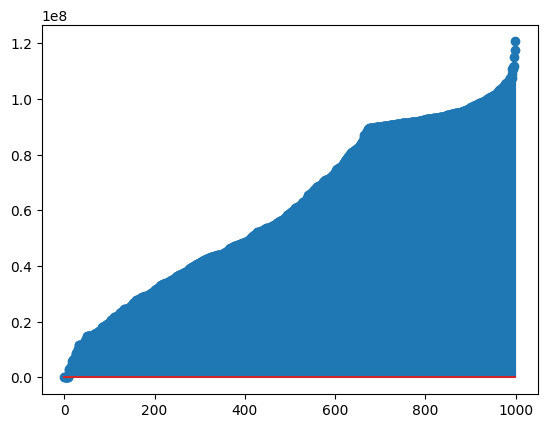

Average fitness: 60869778.201

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 42


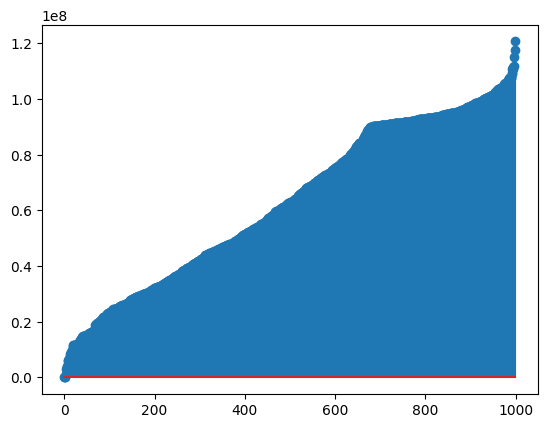

Average fitness: 62364911.112

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 43


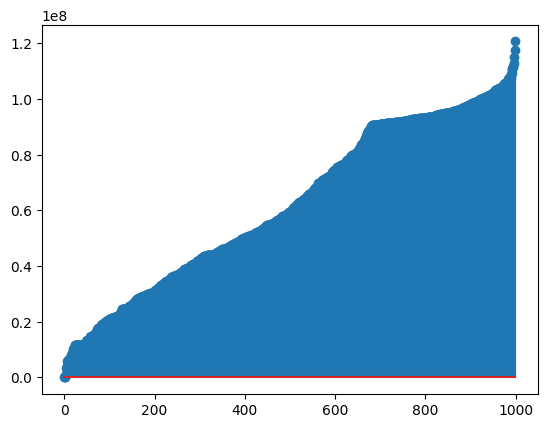

Average fitness: 61629881.349

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 44


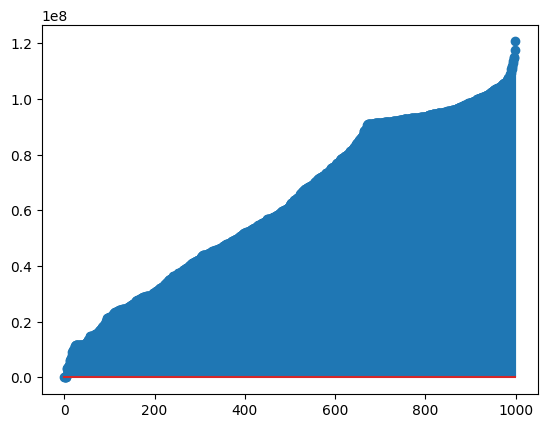

Average fitness: 62470815.258

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 45


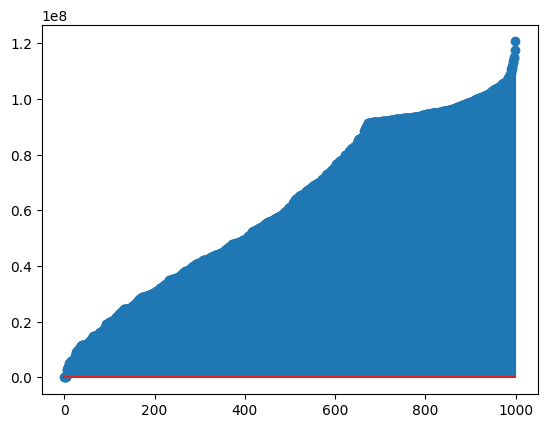

Average fitness: 61958421.871

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 46


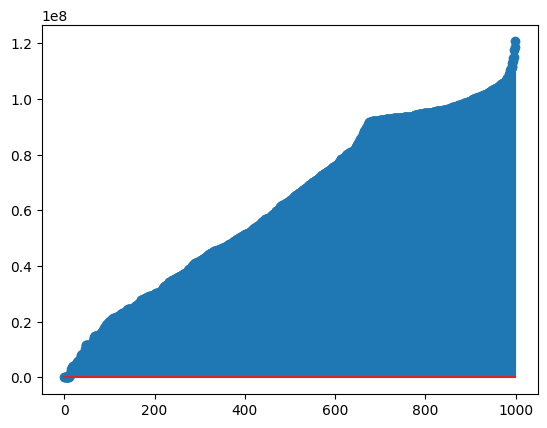

Average fitness: 62291803.086

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 47


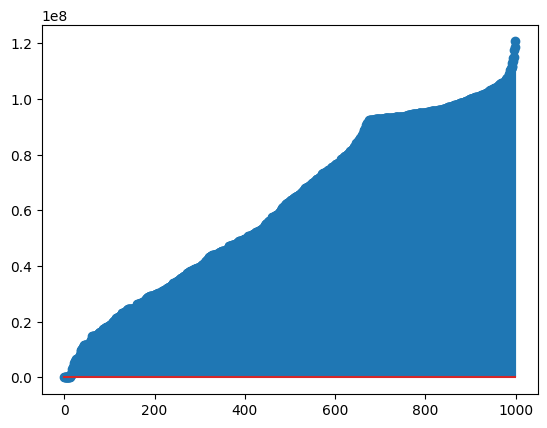

Average fitness: 62047258.969

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 48


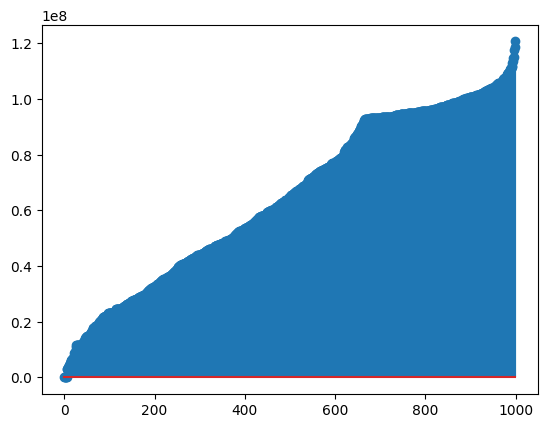

Average fitness: 64300543.267

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 49


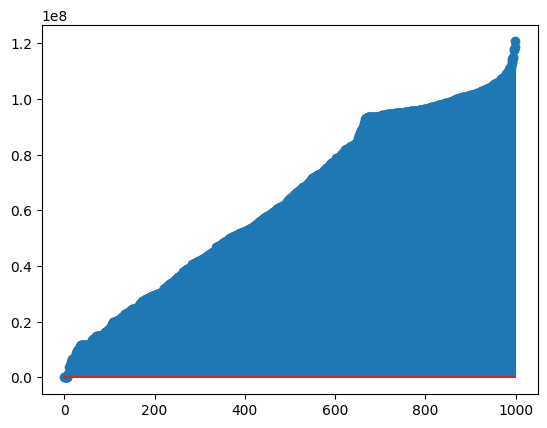

Average fitness: 63307332.078

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 50


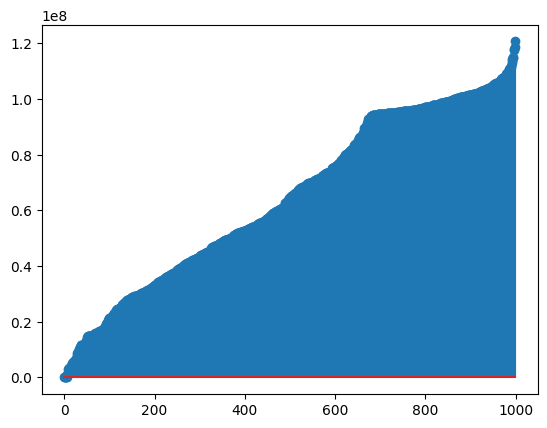

Average fitness: 63996987.962

Most fit grid:
G Z N R W
F A I O G
E S R D L
L I A X K
Z N V E E
['ARIZONA', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
120666887
GENERATION 51


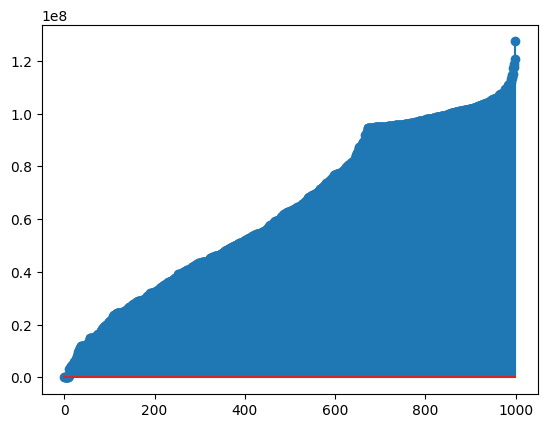

Average fitness: 63785776.696

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 52


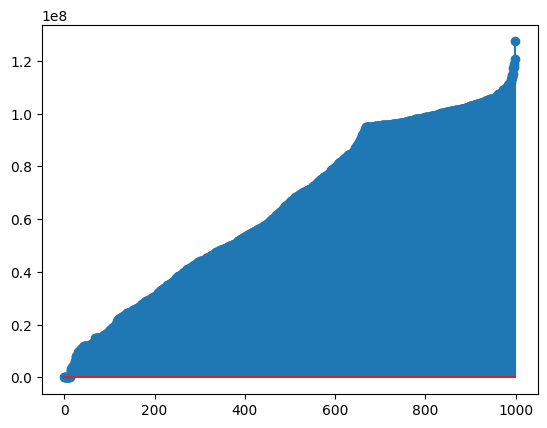

Average fitness: 64497130.797

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 53


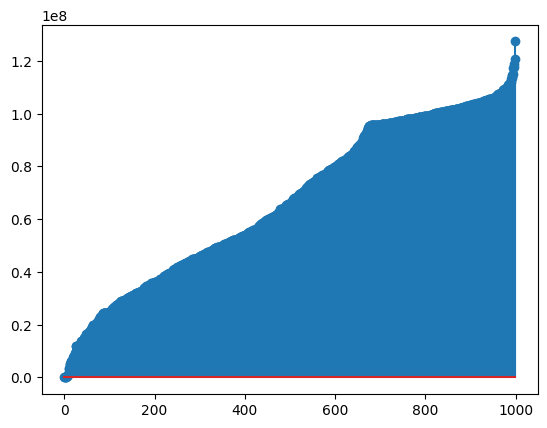

Average fitness: 66338548.883

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 54


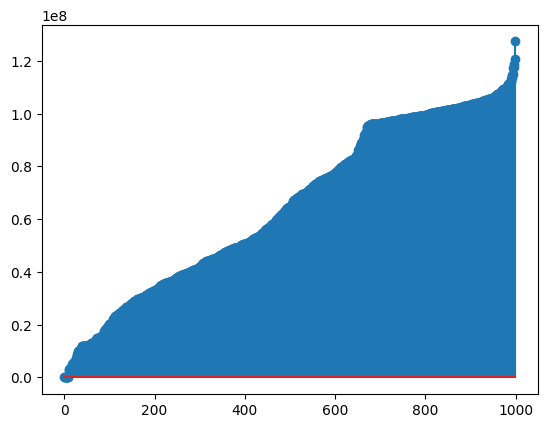

Average fitness: 64450699.487

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 55


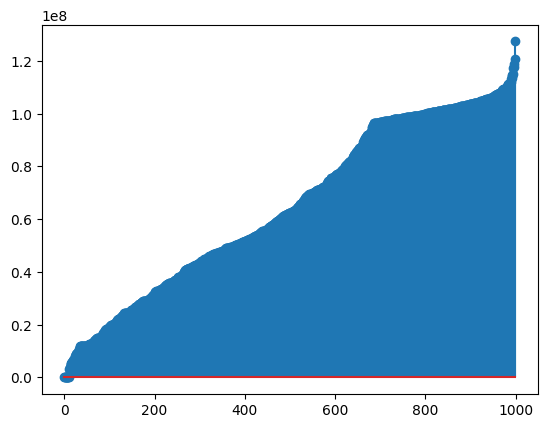

Average fitness: 64146912.803

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 56


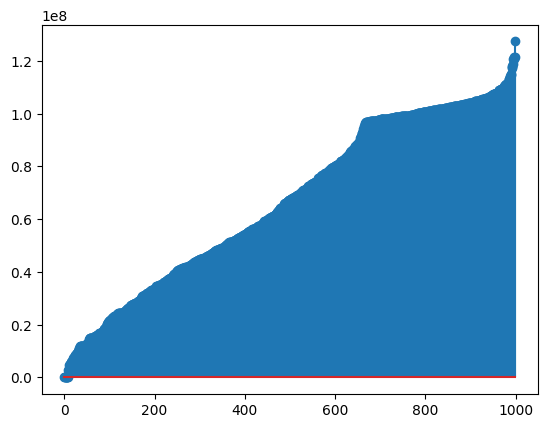

Average fitness: 66090156.505

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 57


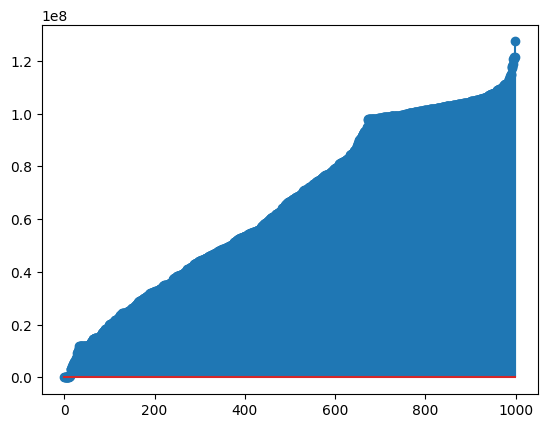

Average fitness: 65612052.27

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 58


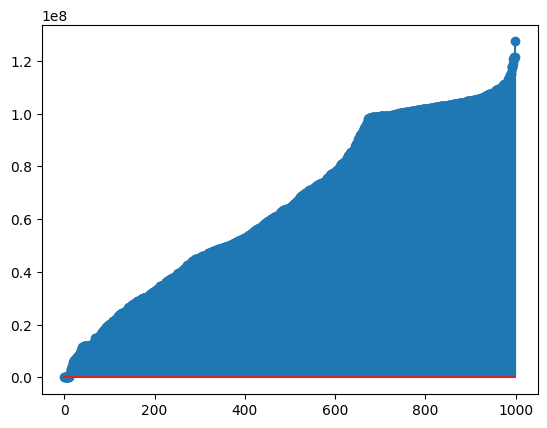

Average fitness: 65734110.841

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 59


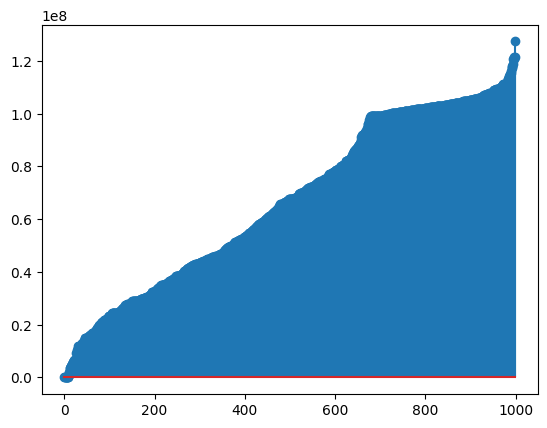

Average fitness: 66211398.675

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 60


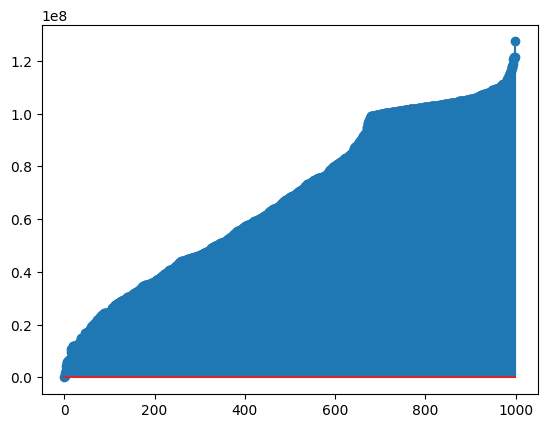

Average fitness: 68065888.269

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 61


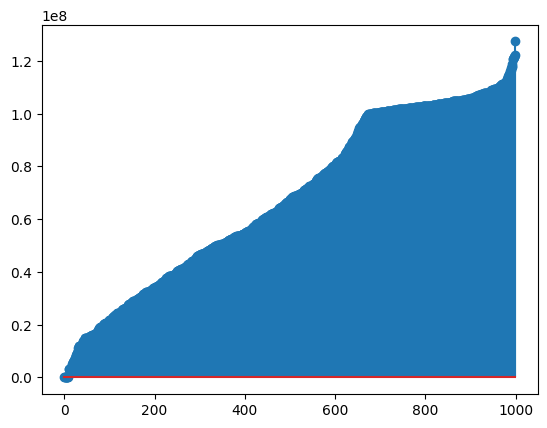

Average fitness: 67336061.215

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 62


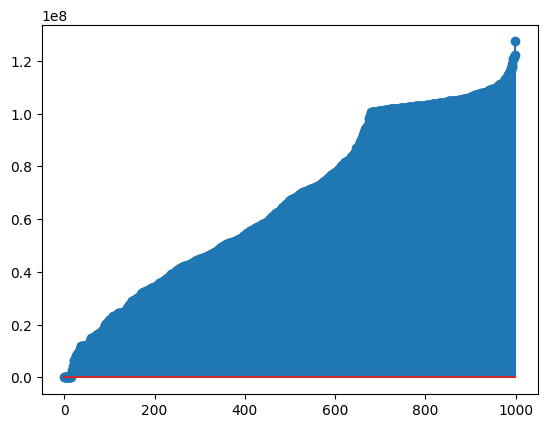

Average fitness: 66587236.863

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 63


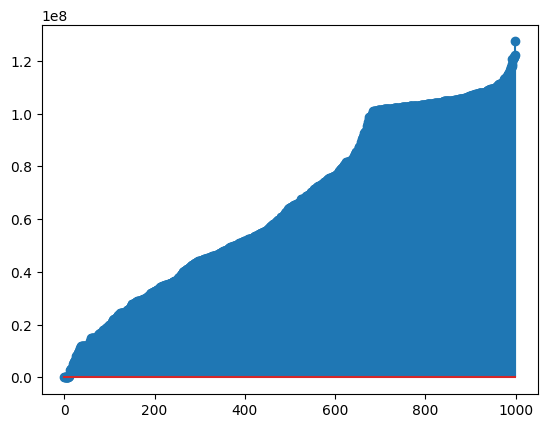

Average fitness: 65670975.509

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 64


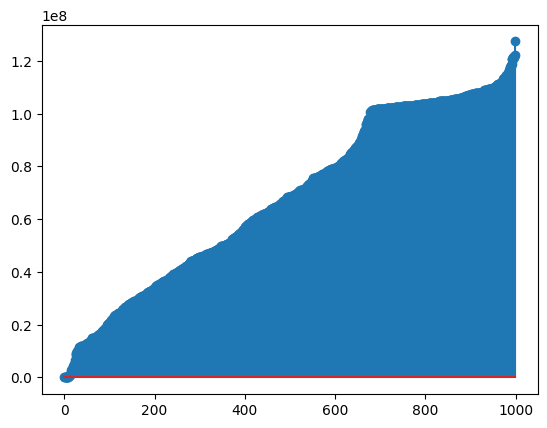

Average fitness: 67465580.978

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 65


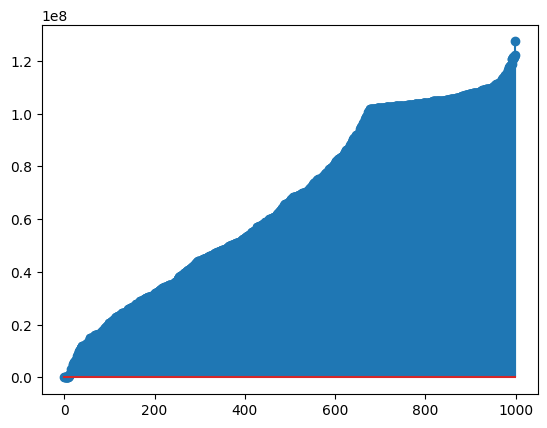

Average fitness: 66821504.412

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 66


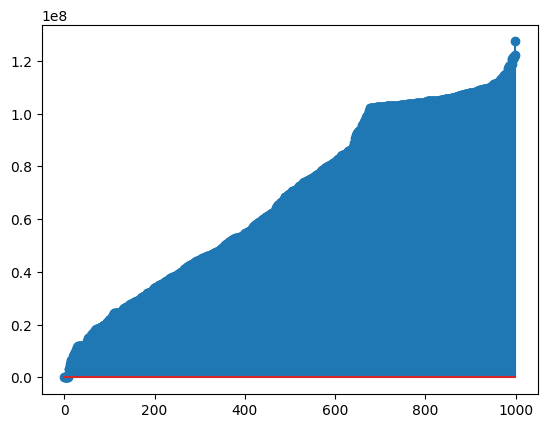

Average fitness: 67955943.116

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 67


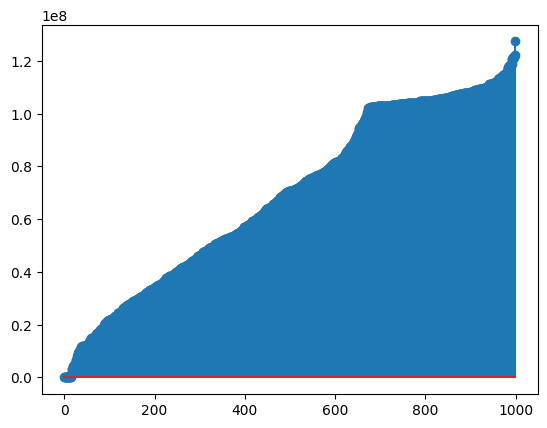

Average fitness: 68513598.801

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 68


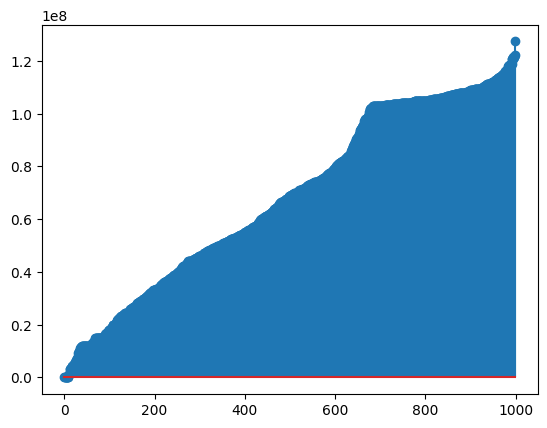

Average fitness: 67637796.167

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 69


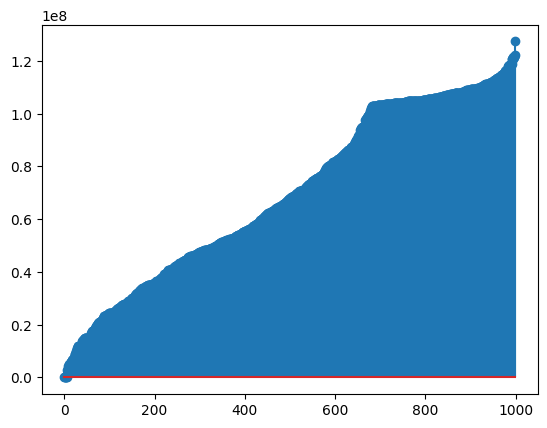

Average fitness: 68976010.246

Most fit grid:
P R A N Z
Z K I O G
E S R D L
L I A X K
P N V E E
['ALASKA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
127349682
GENERATION 70


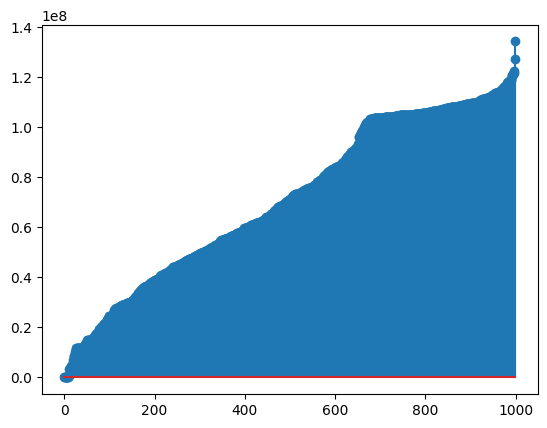

Average fitness: 70487420.071

Most fit grid:
U F X R Z
L J I T X
O N S D X
L I A E O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
134223585
GENERATION 71


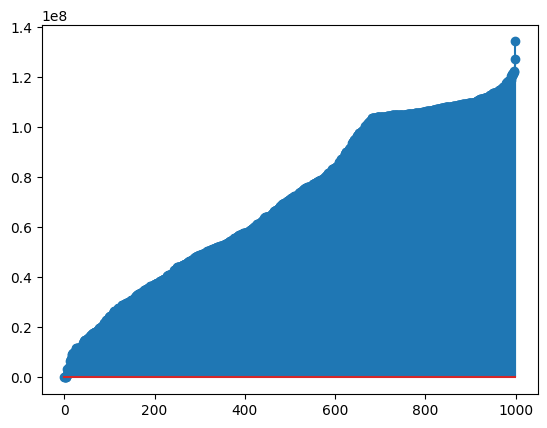

Average fitness: 70473621.008

Most fit grid:
U F X R Z
L J I T X
O N S D X
L I A E O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
134223585
GENERATION 72


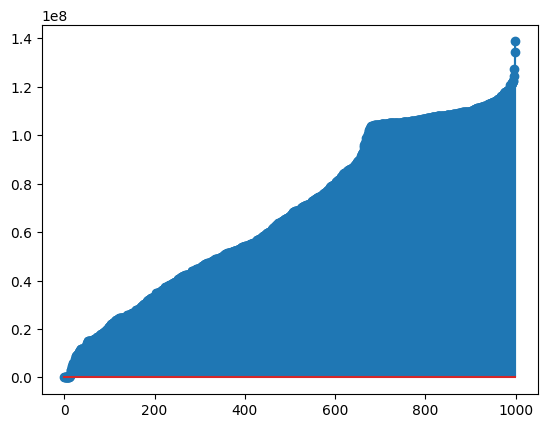

Average fitness: 68112765.672

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 73


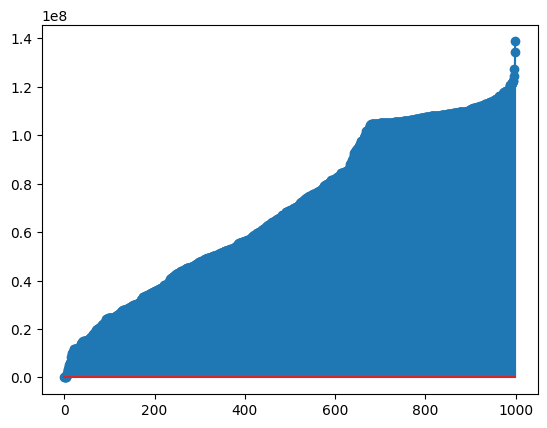

Average fitness: 69896433.141

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 74


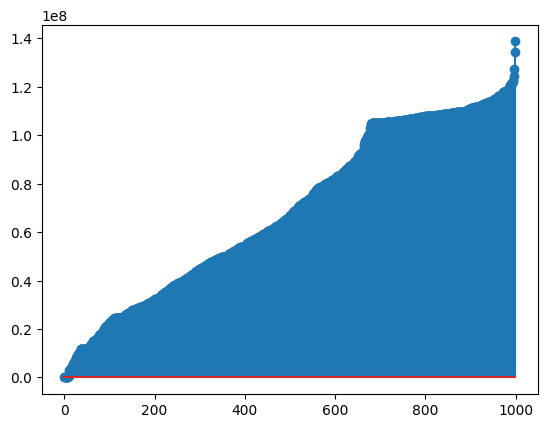

Average fitness: 68505059.954

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 75


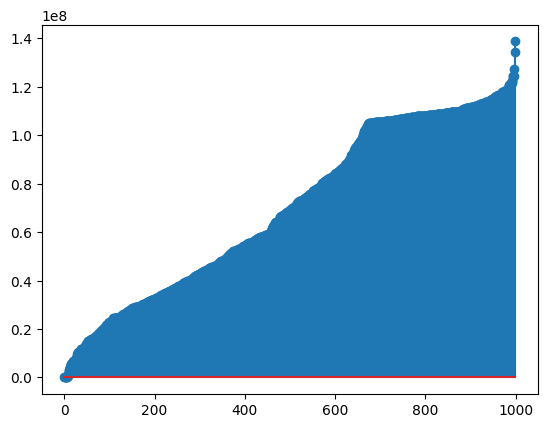

Average fitness: 69100234.346

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 76


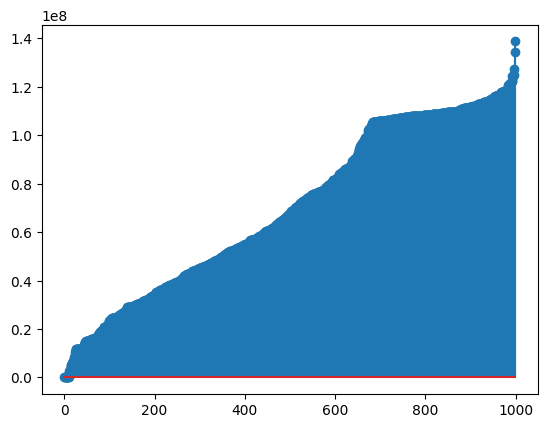

Average fitness: 69333632.48

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 77


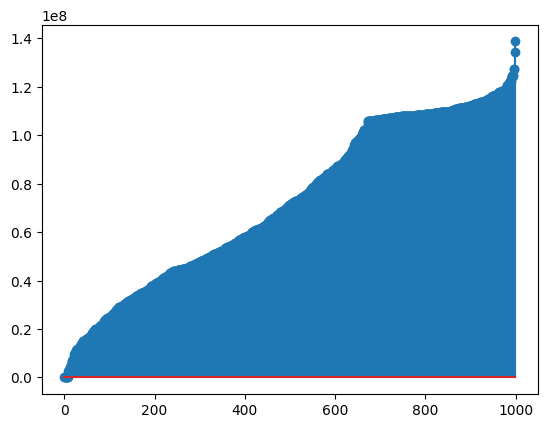

Average fitness: 71628598.774

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 78


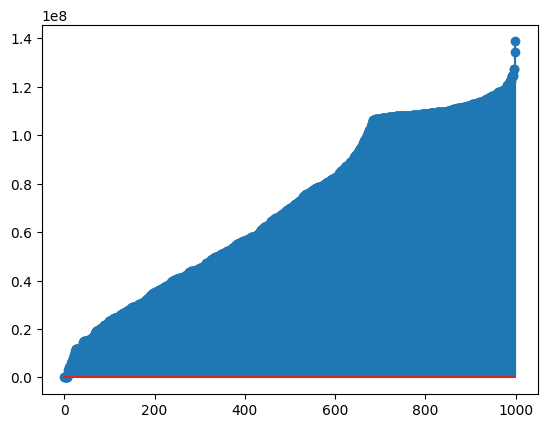

Average fitness: 70163953.253

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 79


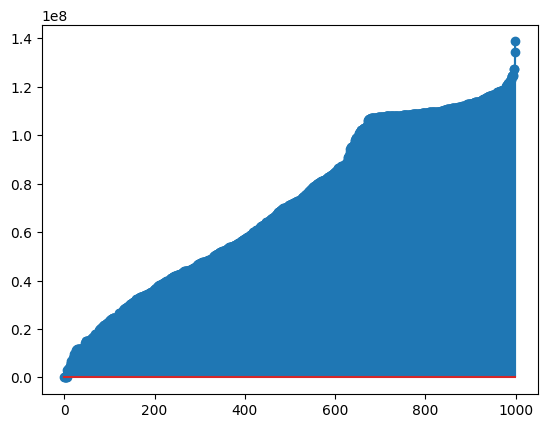

Average fitness: 71323712.819

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 80


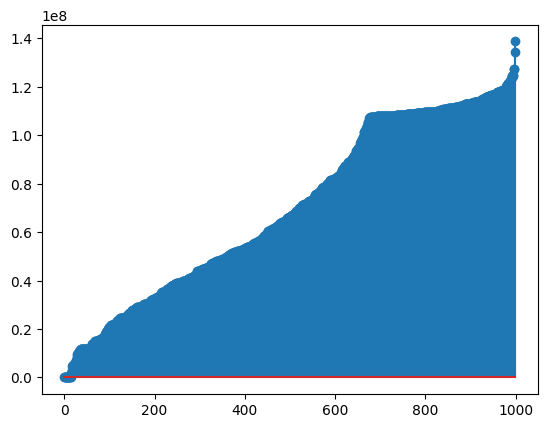

Average fitness: 69077974.972

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 81


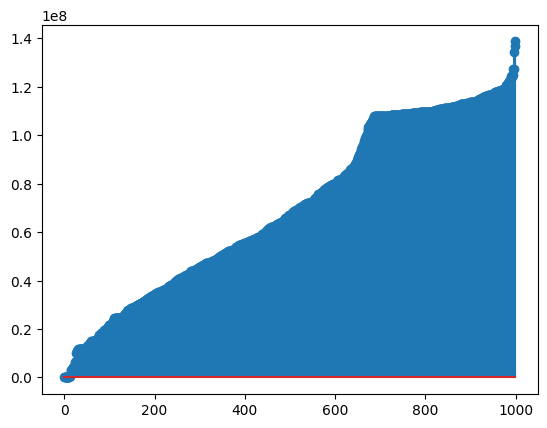

Average fitness: 69472744.066

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 82


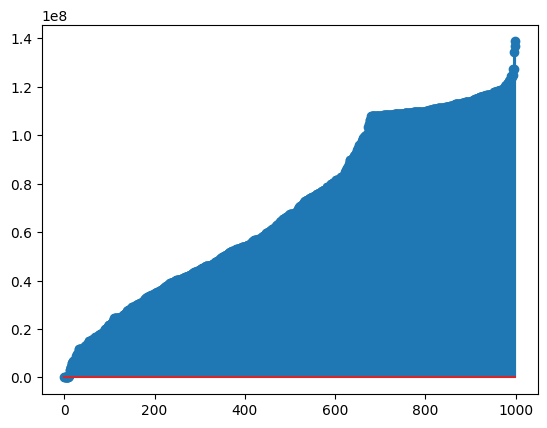

Average fitness: 69708798.538

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 83


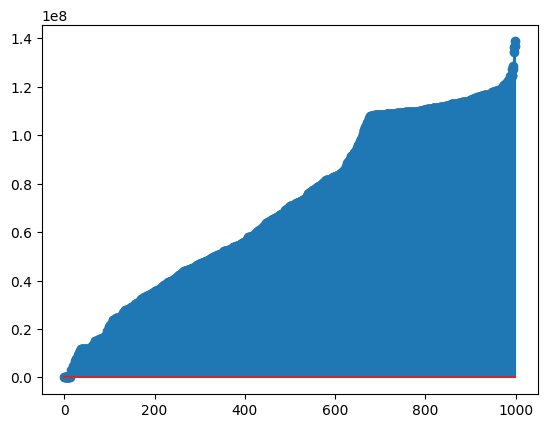

Average fitness: 70821878.103

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 84


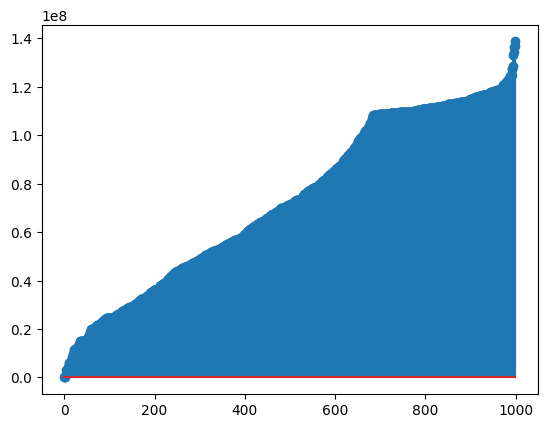

Average fitness: 72372062.513

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 85


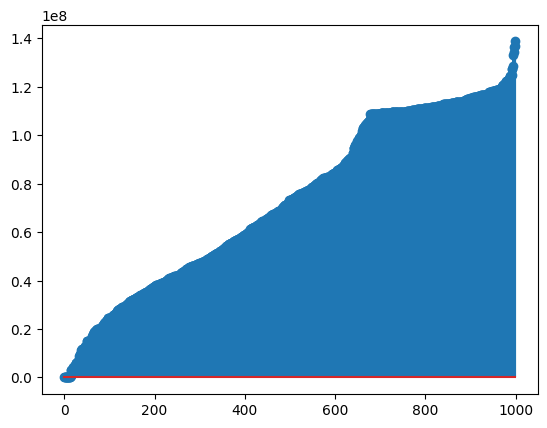

Average fitness: 72281055.114

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 86


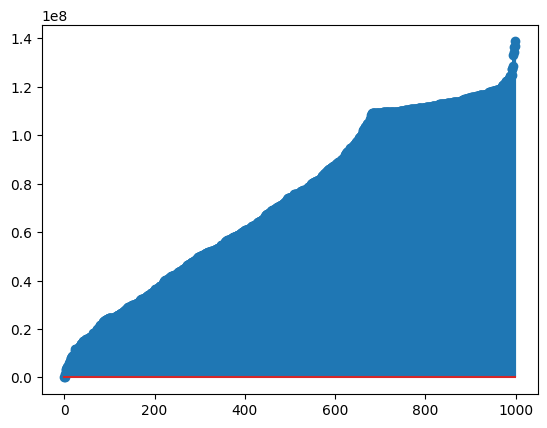

Average fitness: 73103495.222

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 87


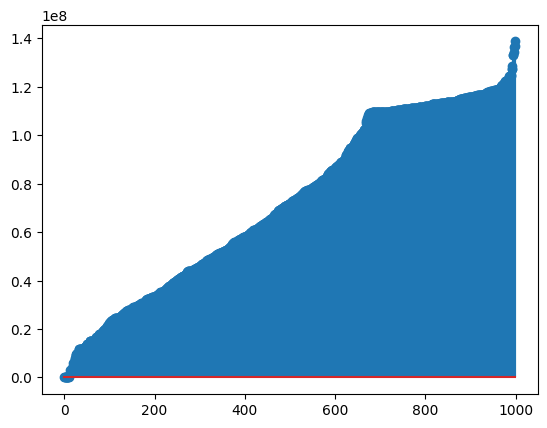

Average fitness: 71837104.521

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 88


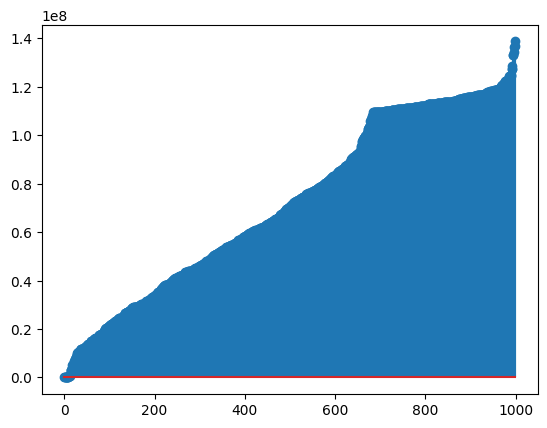

Average fitness: 71249344.034

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 89


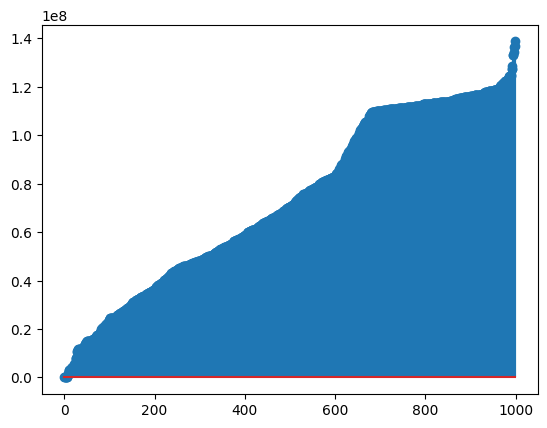

Average fitness: 72527494.344

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 90


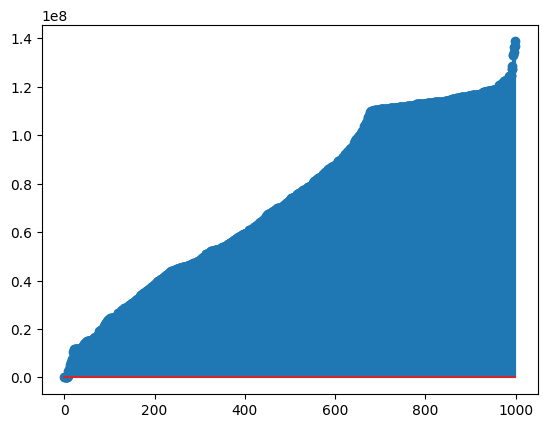

Average fitness: 73436118.962

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 91


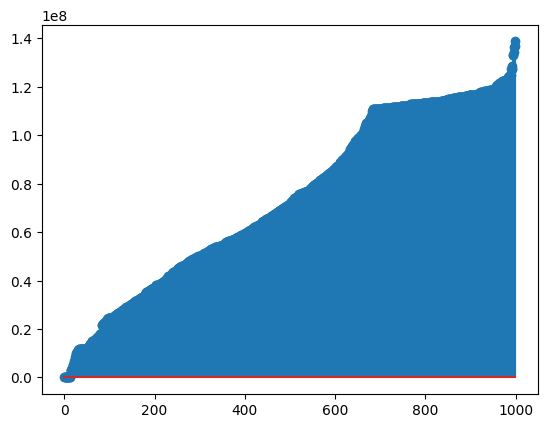

Average fitness: 73214801.136

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 92


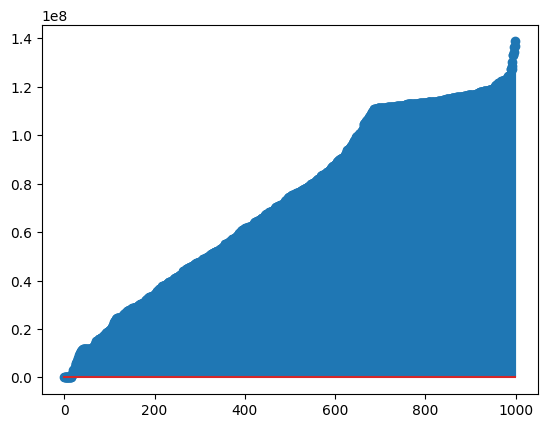

Average fitness: 72867373.551

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 93


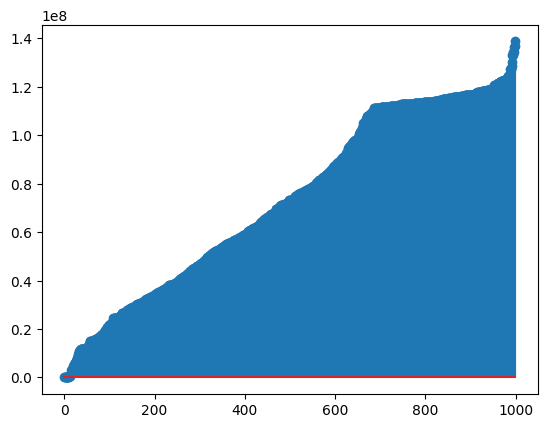

Average fitness: 72732073.113

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 94


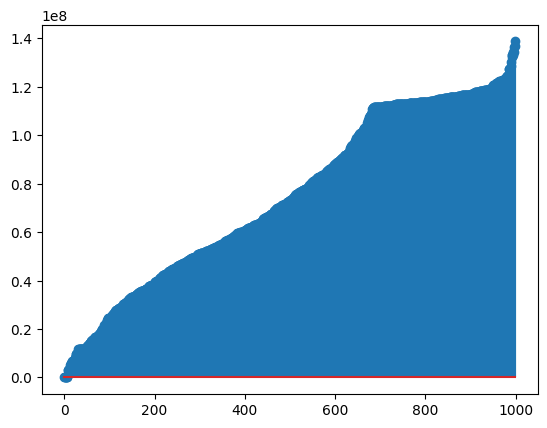

Average fitness: 74220027.689

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 95


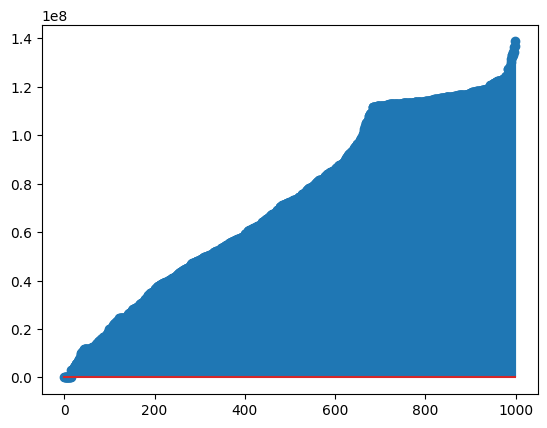

Average fitness: 72701236.927

Most fit grid:
J I Z E I
E R I T X
O N S D X
L I A H O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'MAINE', 'NEVADA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
138690558
GENERATION 96


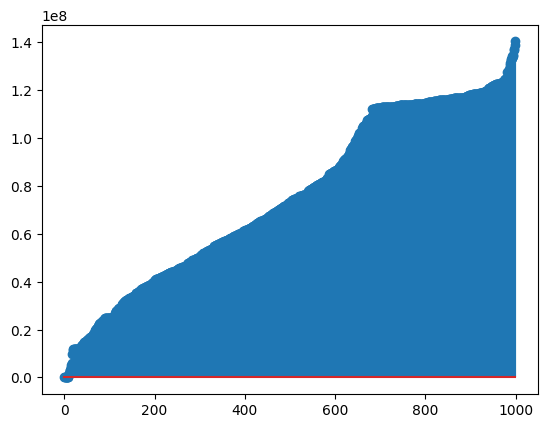

Average fitness: 74639981.199

Most fit grid:
N I F P Z
C R I W O
O N S D X
L I A E O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA', 'WISCONSIN']
140117303
GENERATION 97


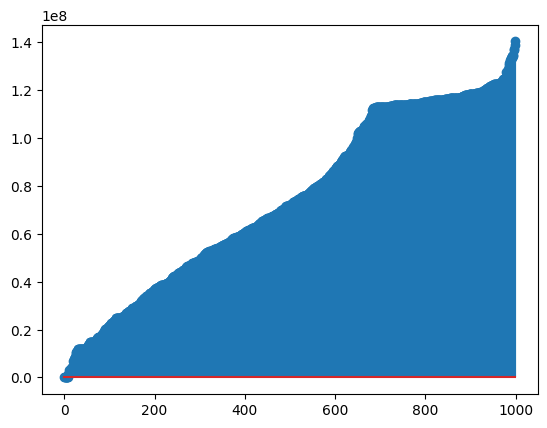

Average fitness: 73602648.984

Most fit grid:
N I F P Z
C R I W O
O N S D X
L I A E O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA', 'WISCONSIN']
140117303
GENERATION 98


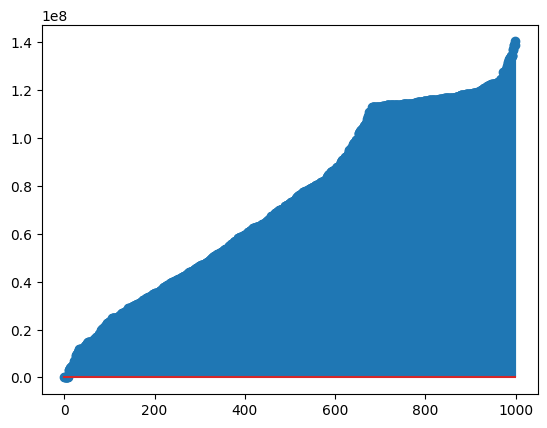

Average fitness: 73487645.886

Most fit grid:
N I F P Z
C R I W O
O N S D X
L I A E O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA', 'WISCONSIN']
140117303
GENERATION 99


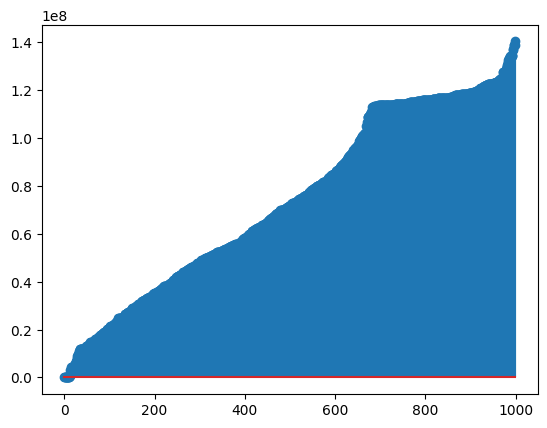

Average fitness: 73202761.055

Most fit grid:
N I F P Z
C R I W O
O N S D X
L I A E O
O R G X R
['ARIZONA', 'ARKANSAS', 'COLORADO', 'FLORIDA', 'GEORGIA', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'LOUISIANA', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA', 'WISCONSIN']
140117303



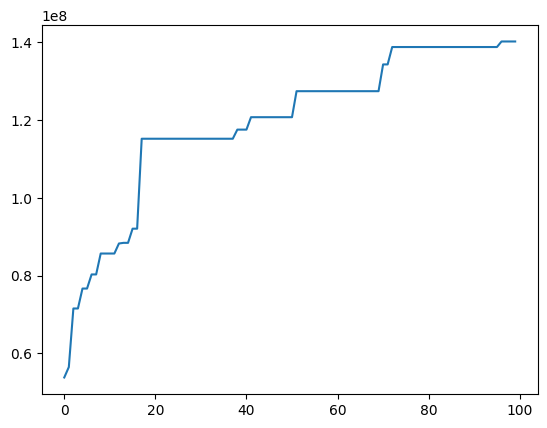

In [6]:
generation = 0
population = [Grid.init_rand(5,5) for _ in range(POPULATION_SIZE)]
population.sort(key=lambda g:g.fitness)
most_fit = population[-1]
highest_fitnesses = []

while most_fit.fitness < TERMINAL_FITNESS and generation < MAX_GENERATIONS:
    print(f"GENERATION {generation}")
    highest_fitnesses.append(most_fit.fitness)
    population_fitness_statistics(population=population)
    print_individual(most_fit, "Most fit")
    population = propagate_next_generation(population, int(POPULATION_SIZE*GENERATION_CUTTOFF))
    #population = propagate_next_generation(population, most_fit.fitness*GENERATION_CUTTOFF)
    population.sort(key=lambda g:g.fitness)
    most_fit = population[-1]
    generation += 1

print()
plot_fitnesses_over_gens(highest_fitnesses)
print()
